In [46]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pymc3 as pm
import statsmodels.api as sm
from statsmodels.tools import add_constant
from itertools import combinations
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/Users/sethgalluzzi/Downloads/movies.csv')

In [6]:
df.head(1).T

,0
Unnamed: 0,1
title,Filly Brown
title_type,Feature Film
genre,Drama
runtime,80.0
mpaa_rating,R
studio,Indomina Media Inc.
thtr_rel_year,2013
thtr_rel_month,4
thtr_rel_day,19


In [103]:
df_clean = df[['title','title_type','genre','runtime','mpaa_rating',
              'thtr_rel_year','thtr_rel_month','thtr_rel_day',
              'imdb_rating','imdb_num_votes','critics_rating', 
              'critics_score', 'audience_rating', 'audience_score',
              'best_pic_nom', 'best_pic_win','best_actor_win','best_actress_win',
              'best_dir_win','top200_box']]

In [104]:
df_clean['top200_box'].value_counts()

no     636
yes     15
Name: top200_box, dtype: int64

In [20]:
df_clean.describe()

,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,imdb_rating,imdb_num_votes,critics_score,audience_score
count,650.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,105.821538,1997.941628,6.740399,14.416283,6.493088,57532.983103,57.688172,62.362519
std,19.445047,10.974501,3.554223,8.861167,1.084747,112124.386910,28.402971,20.222624
min,39.000000,1970.000000,1.000000,1.000000,1.900000,180.000000,1.000000,11.000000
25%,92.000000,1990.000000,4.000000,7.000000,5.900000,4545.500000,33.000000,46.000000
50%,103.000000,2000.000000,7.000000,15.000000,6.600000,15116.000000,61.000000,65.000000
75%,115.750000,2007.000000,10.000000,21.000000,7.300000,58300.500000,83.000000,80.000000
max,267.000000,2014.000000,12.000000,31.000000,9.000000,893008.000000,100.000000,97.000000


In [23]:
features = df.loc[df['title_type'] == 'Feature Film']



features['genre'].value_counts()

Drama                        301
Comedy                        85
Action & Adventure            65
Mystery & Suspense            59
Horror                        23
Other                         15
Art House & International     14
Science Fiction & Fantasy      9
Animation                      9
Musical & Performing Arts      8
Documentary                    3
Name: genre, dtype: int64

In [22]:
df_clean['title_type'].value_counts()

Feature Film    591
Documentary      55
TV Movie          5
Name: title_type, dtype: int64

In [4]:
df.corr()

,Unnamed: 0,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_score,audience_score
Unnamed: 0,1.000000,-0.040722,-0.003676,-0.002700,0.038116,-0.006841,-0.013576,0.028463,0.017521,0.021794,-0.011316,0.011352
runtime,-0.040722,1.000000,-0.104377,0.220987,0.037396,-0.081902,-0.033309,0.024235,0.268240,0.347215,0.172499,0.180963
thtr_rel_year,-0.003676,-0.104377,1.000000,-0.000507,0.107400,0.660465,0.036678,-0.003763,-0.030003,0.155906,-0.080785,-0.054079
thtr_rel_month,-0.002700,0.220987,-0.000507,1.000000,0.116228,-0.009989,-0.168612,0.028240,0.072278,0.106326,0.032404,0.032690
thtr_rel_day,0.038116,0.037396,0.107400,0.116228,1.000000,0.041322,-0.025531,0.001797,0.021891,0.067976,0.013689,0.019221
dvd_rel_year,-0.006841,-0.081902,0.660465,-0.009989,0.041322,1.000000,-0.006506,-0.068134,-0.015263,0.093711,0.015212,-0.062970
dvd_rel_month,-0.013576,-0.033309,0.036678,-0.168612,-0.025531,-0.006506,1.000000,-0.030141,0.064806,0.030912,0.031070,0.057349
dvd_rel_day,0.028463,0.024235,-0.003763,0.028240,0.001797,-0.068134,-0.030141,1.000000,0.026912,-0.016419,-0.024228,0.021644
imdb_rating,0.017521,0.268240,-0.030003,0.072278,0.021891,-0.015263,0.064806,0.026912,1.000000,0.331152,0.765036,0.864865
imdb_num_votes,0.021794,0.347215,0.155906,0.106326,0.067976,0.093711,0.030912,-0.016419,0.331152,1.000000,0.209251,0.289813


In [5]:
df['title_type'].value_counts()

Feature Film    591
Documentary      55
TV Movie          5
Name: title_type, dtype: int64

In [9]:
from sklearn.linear_model import LinearRegression as lm

In [ ]:
df_sub = 

In [10]:
dfsub = df.loc[:, df.columns != 'audience_score']

In [12]:
dfaud = df[["audience_score"]]


In [13]:
dfaud

,audience_score
0,73
1,81
2,91
3,76
4,27
...,...
646,26
647,81
648,52
649,34


In [14]:
dfsub

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,647,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,...,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,648,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,...,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,649,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,...,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,650,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,...,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


In [16]:
model = lm.fit(dfsub, dfaud)

TypeError: fit() missing 1 required positional argument: 'y'

Text(0.5, 1.0, 'Audience Score Histogram')

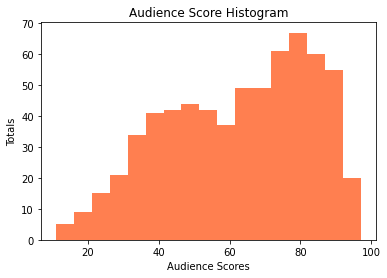

In [67]:
plt.hist(df['audience_score'], bins =17, color= 'coral')
plt.ylabel('Totals')
plt.xlabel('Audience Scores')
plt.title('Audience Score Histogram')

Text(0.5, 1.0, 'Audience Score Scatterplot')

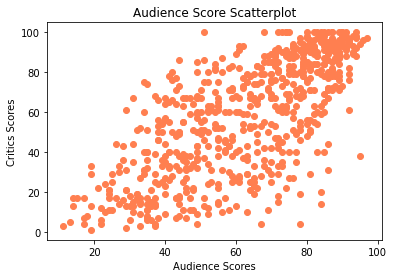

In [72]:
plt.scatter(df['audience_score'], df['critics_score'], color= 'coral')
plt.ylabel('Critics Scores')
plt.xlabel('Audience Scores')
plt.title('Audience Score Scatterplot')

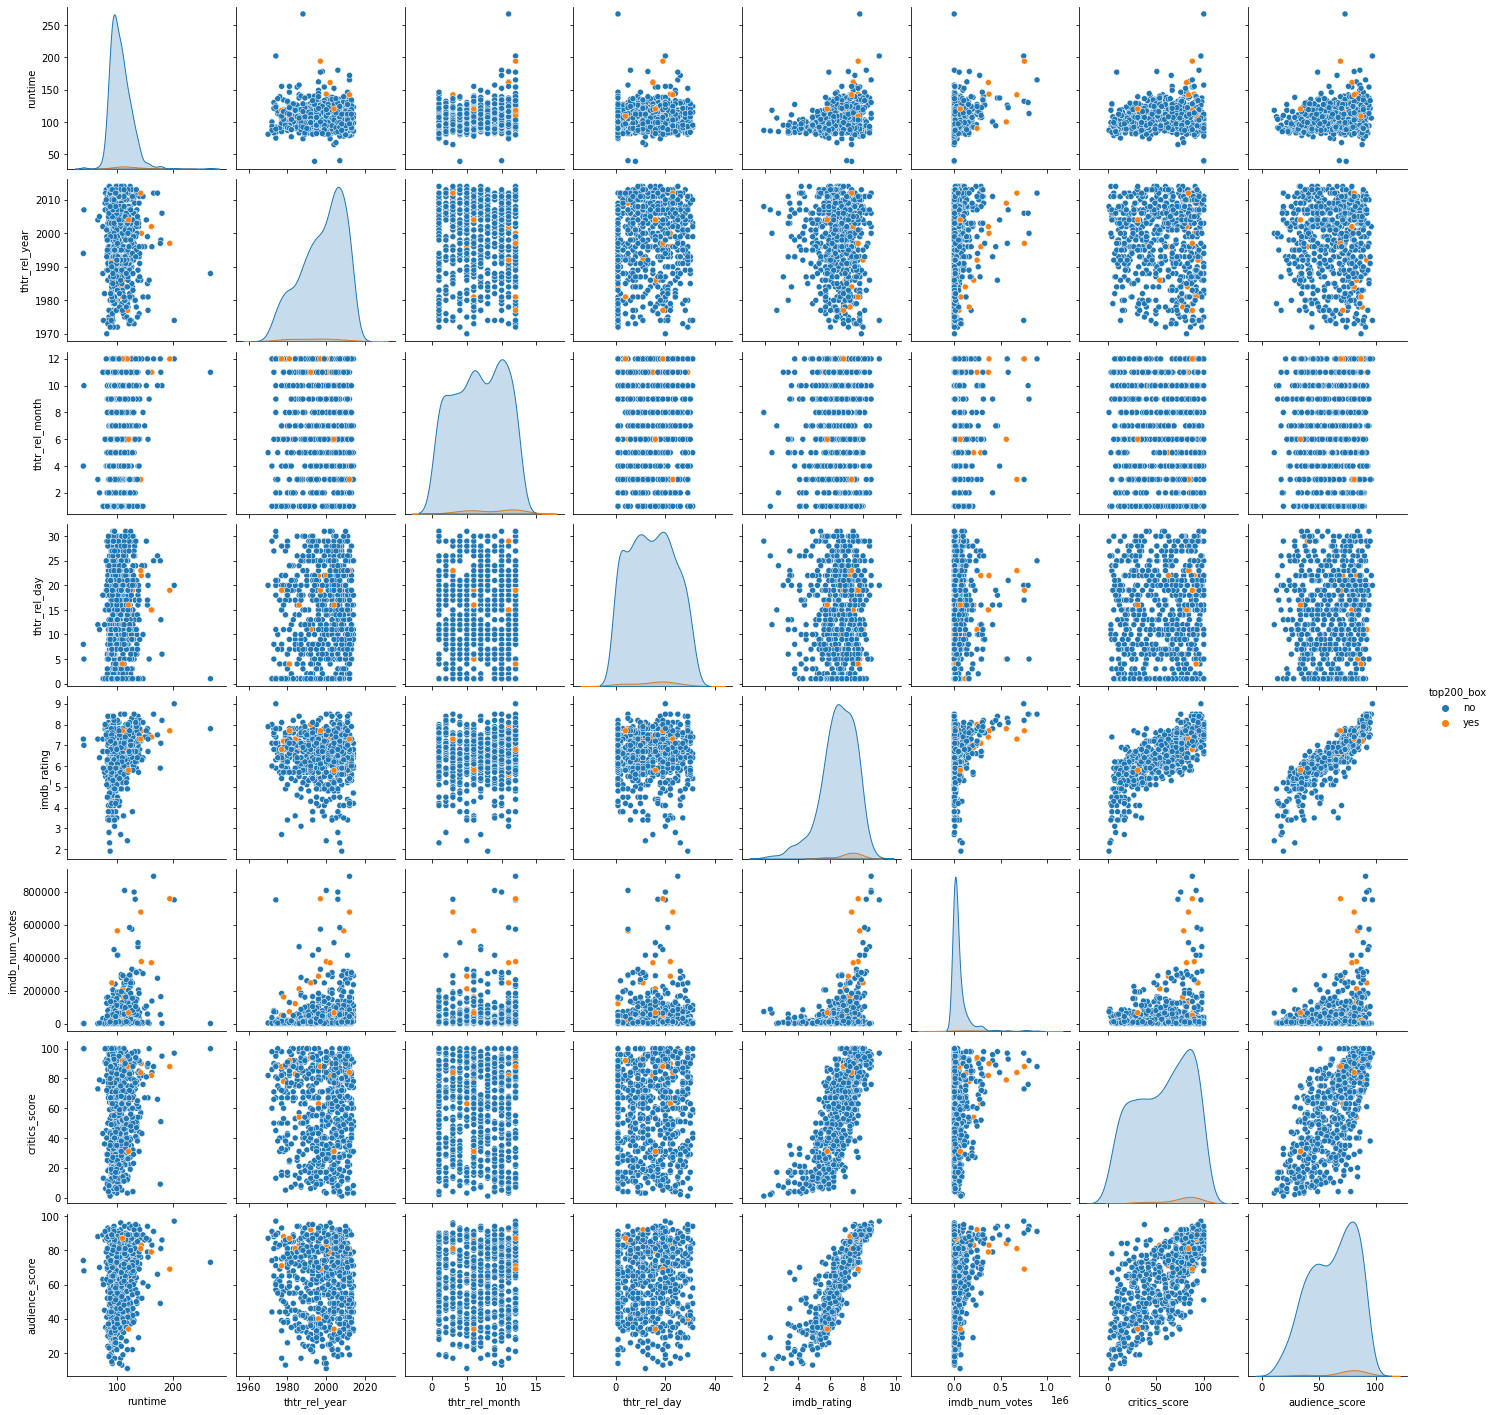

In [105]:
#df_sub= df_clean['critics_score', 'audience_score']


sns.pairplot(df_clean, hue = 'top200_box')

In [78]:
df_clean['studio'].value_counts()

Paramount Pictures                  37
Warner Bros. Pictures               30
Sony Pictures Home Entertainment    27
Universal Pictures                  23
Warner Home Video                   19
                                    ..
Walt Disney Home Entertainment       1
Magnet/Magnolia Pictures             1
Vestron Video                        1
The Shooting Gallery                 1
Brainstorm Media                     1
Name: studio, Length: 211, dtype: int64

In [86]:
df_studio = df_clean['studio'].value_counts()

In [88]:
df_studio.head(20)

Paramount Pictures                          37
Warner Bros. Pictures                       30
Sony Pictures Home Entertainment            27
Universal Pictures                          23
Warner Home Video                           19
20th Century Fox                            18
Miramax Films                               18
MGM                                         16
Twentieth Century Fox Home Entertainment    14
IFC Films                                   13
MCA Universal Home Video                    13
Paramount Home Video                        12
New Line Cinema                             10
Sony Pictures                               10
Sony Pictures Classics                      10
Buena Vista Pictures                         9
Magnolia Pictures                            9
WARNER BROTHERS PICTURES                     9
MGM Home Entertainment                       9
HBO Video                                    8
Name: studio, dtype: int64

Text(0.5, 1.0, 'Critics Score Histogram')

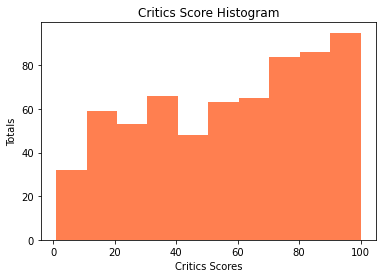

In [63]:
plt.hist(df['critics_score'], bins = 10, color= 'coral')
plt.ylabel('Totals')
plt.xlabel('Critics Scores')
plt.title('Critics Score Histogram')

In [27]:
df_counts = df['audience_score'].value_counts()